In [50]:
import itchat
itchat.auto_login(hotReload = True)
friends = itchat.get_friends(update = True)

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 黄钦


In [6]:
sexes = [friend['Sex'] for friend in friends[1:]]

In [7]:
from collections import Counter
#对好友性别计数
counts = [c[1] for c in Counter(sexes).items()]

In [7]:
import matplotlib.pyplot as plt

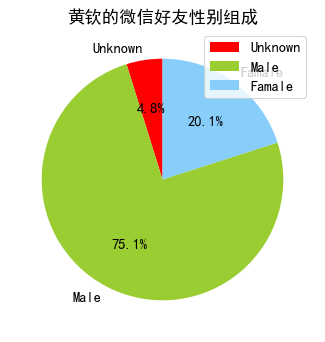

LOG OUT!


In [11]:
labels = ['Unknown', 'Male', 'Famale']
colors = ['red', 'yellowgreen', 'lightskyblue']
plt.figure(figsize=(8, 5), dpi = 80)
plt.rc('font', family='SimHei', size=13)
plt.axes(aspect = 1)
plt.pie(counts, labels = labels,
		colors = colors,
		labeldistance = 1.1,
		autopct = "%3.1f%%",
		shadow = False,
		startangle = 90, 
		pctdistance = 0.6)
plt.legend(loc = 'upper right')
plt.title(u'%s的微信好友性别组成' % friends[0]['NickName'])
plt.show()

In [80]:
import TencentYoutuyun
appid = '10122237'
secret_id = 'AKID77zhEbe8798xb5pWTJzVq11ykLl1rygH'
secret_key = 'ZxAD5nKzTmttiLn3EE2hBUcaP5bx8C8v'
userid = '250761123'
end_point = TencentYoutuyun.conf.API_YOUTU_END_POINT
youtu = TencentYoutuyun.YouTu(appid, secret_id, secret_key, userid, end_point)

In [27]:
import pandas as pd
df_friends = pd.DataFrame(friends)
df_friends.columns

Index(['Alias', 'AppAccountFlag', 'AttrStatus', 'ChatRoomId', 'City',
       'ContactFlag', 'DisplayName', 'EncryChatRoomId', 'HeadImgFlag',
       'HeadImgUrl', 'HideInputBarFlag', 'IsOwner', 'KeyWord', 'MemberCount',
       'MemberList', 'NickName', 'OwnerUin', 'PYInitial', 'PYQuanPin',
       'Province', 'RemarkName', 'RemarkPYInitial', 'RemarkPYQuanPin', 'Sex',
       'Signature', 'SnsFlag', 'StarFriend', 'Statues', 'Uin', 'UniFriend',
       'UserName', 'VerifyFlag', 'WebWxPluginSwitch'],
      dtype='object')

In [45]:
[friend['RemarkName'] if friend['RemarkName'] else friend['NickName'] for friend in friends]

In [46]:
import os.path
img_dir = "./head_img/"
for index, friend in enumerate(friends):
    #好友如果加了备注，取备注作为friend_name,否则使用昵称
    friend_name = friend['RemarkName'] if friend['RemarkName'] else friend['NickName']
    head_img_file = friend_name + '.jpg'
    head_img_path = os.path.abspath(os.path.join(img_dir, head_img_file))
    if not os.path.exists(head_img_path):
        print("Getting head image of {}".format(friend_name))
        head_img_file = img_dir + friend_name + '.jpg'
        #获取头像文件并保存，参数为好友的'UserName'字段
        imgData = itchat.get_head_img(userName = friend['UserName'])
        with open(head_img_file, 'wb') as f:
            f.write(imgData)
    else:
        print("Head image file of {} already exists.".format(friend_name))

In [90]:
from functools import reduce
tag = youtu.imagetag('cj.jpg')
tags = reduce(lambda x, y: x+y, [t['tag_name'] for t in tag['tags']])
img_tags = tags.encode('iso8859-1').decode('utf-8')


In [98]:
youtu.DetectFace(os.path.abspath(os.path.join(img_dir, os.listdir(img_dir)[1])))

{'errorcode': -1101,
 'errormsg': 'SDK_IMAGE_FACEDETECT_FAILED',
 'face': [],
 'image_height': 321,
 'image_width': 320,
 'session_id': ''}

In [ ]:
use_heads = []
no_heads = []
others = []
for index, file_name in enumerate(os.listdir(img_dir)):
    file_path = os.path.abspath(os.path.join(img_dir, file_name))
    friend_name = os.path.splitext(file_name)[0]
    try:
        #检测图片文件中是否出现人脸，返回值为json对象
        result = youtu.DetectFace(file_path)
    except Exception as e:
        print(e)
    #根据errorcode判断是否出现人脸，0为出现人脸，-1101为未发现人脸，-1131为非法图片文件
    if 0 == result['errorcode']:
        print("{} 使用了人像作为头像".format(friend_name))
        use_heads.append(friend_name)
    elif -1101 == result['errorcode']:
        print("{} 没有使用人像作为头像".format(friend_name))
        no_heads.append(friend_name)
    else:
        other_result = {}
        other_result['friend_name'] = friend_name
        other_result['errorcode'] = result['errorcode']
        other_result['errormsg'] = result['errormsg']
        print(other_result)
        others.append(other_result)
print("There are {} friends who use head portrait and {} friends who don't use head portrait.".format(len(use_heads), len(no_heads)))

In [121]:
import json
json_face = {"use_face": use_heads, "not_face":no_heads}
json.dump(json_face, open('face.json', 'w'))

In [ ]:
friends_tags = ""
tags_json = {}
for file_name in os.listdir(img_dir):
    file_path = os.path.abspath(os.path.join(img_dir, file_name))
    friend_name = os.path.splitext(file_name)[0]
    try:
        tag = youtu.imagetag(file_path)
        #friend_tags = ','.join(list(map(lambda x:x['tag_name'], tag['tags'])))
        tags = list(map(lambda x:x['tag_name'].encode('iso8859-1').decode('utf-8'), tag['tags']))
        tags_json[friend_name] = tags
        friend_tags = ','.join(list(map(lambda x:x['tag_name'].encode('iso8859-1').decode('utf-8'), tag['tags'])))
        print(friend_name, friend_tags)
        friends_tags += friend_tags + ','
    except Exception as e:
        print(e)
print(friends_tags)

In [4]:
import numpy as np
from PIL import Image

In [130]:
with open('friend_tags.json', 'w') as tag_file:
    json.dump(tags_json, tag_file)

In [138]:
#统计标签出现次数
tag_counter = {}
for tags in tags_json.values():
    for tag in tags:
        if tag in tag_counter:
            tag_counter[tag] += 1
        else:
            tag_counter[tag] = 1

In [141]:
#对标签出现次数排序
sorted_tag_counter = sorted(tag_counter.items(), key = lambda x: x[1], reverse=True)
sorted_tag_counter[:10]

[('树木', 97),
 ('天空', 86),
 ('女孩', 81),
 ('卡通', 69),
 ('合影', 58),
 ('男孩', 55),
 ('小孩', 53),
 ('云', 43),
 ('截图', 42),
 ('山', 37)]

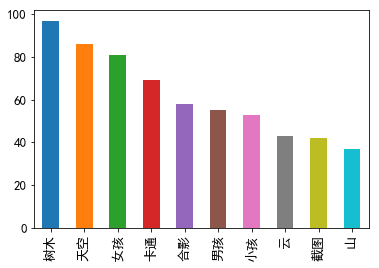

In [156]:
import pandas as pd
s_tag = pd.Series(tag_counter)
s_tag = s_tag.sort_values(ascending=False)
plt.rc('font', family='SimHei', size=13)
s_tag[:10].plot(kind='bar')

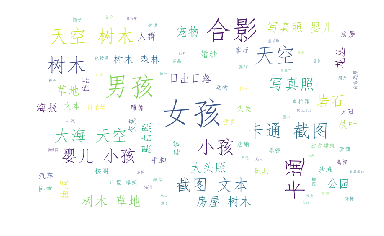

In [151]:
from wordcloud import WordCloud
#back_coloring = np.array(Image.open('round.jpg'))
wordcloud = WordCloud(
        font_path='simfang.ttf',
        background_color="white",
        max_words=1200,
        mask=None, 
        max_font_size=75,
        random_state=45,
        width=800, 
        height=480, 
        margin=15
    )

wordcloud.generate(friends_tags)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()